In [15]:
import json
import pandas as pd
import numpy as np

In [16]:
with open("latency_data.json", "r+") as f:
    data = json.load(f)
    print(data)

{'2325_2325': [3.946945071220398e-06, 2.1131709218025208e-06, 1.7113052308559418e-06], '2325_1935': [5.417961891274899, 6.493070125114173, 5.9925165781751275], '2325_1545': [5.988148535601795, 5.993050922174007, 5.9930522493086755], '2325_1155': [5.994122187141329, 5.992750192061067, 5.993179856799543], '2325_765': [5.992314489092678, 5.99366081925109, 5.992835707962513], '2325_375': [5.992940065916628, 5.993483614176512, 5.993037129286677], '1935_2325': [5.992033889051527, 6.492849703878164, 5.992860497906804], '1935_1935': [2.9993243515491486e-06, 4.1558872908353806e-05, 2.2300519049167633e-06], '1935_1545': [4.902818147093058, 5.9928066288121045, 5.9928995431400836], '1935_1155': [5.9924927819520235, 5.992185771930963, 5.992713596206158], '1935_765': [5.9933467181399465, 5.991836779285222, 5.9929833258502185], '1935_375': [5.98950706794858, 5.992684635799378, 5.9904962526634336], '1545_2325': [5.9926782958209515, 5.992597011849284, 5.993056514766067], '1545_1935': [5.992597543634474

In [17]:
rows = []
for k, v in data.items():
    start, end = map(int, k.split("_"))
    rows.append({
        "start_freq": start,
        "end_freq": end,
        "mean_latency": int(1000*np.mean(v))
    })

df = pd.DataFrame(rows)

In [18]:
df.head()

,start_freq,end_freq,mean_latency
0,2325,2325,0
1,2325,1935,5967
2,2325,1545,5991
3,2325,1155,5993
4,2325,765,5992


In [19]:
heatmap_df = df.pivot(
    index="start_freq",
    columns="end_freq",
    values="mean_latency"
).sort_index(ascending=False)  # optional: highest freq on top

In [59]:
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

# White → yellow → red (perceptually nice)
colors = ["#ffffff", "#fff3b0", "#bb2222"]
white_red_cmap = LinearSegmentedColormap.from_list(
    "white_red",
    colors,
    N=256
)


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: 

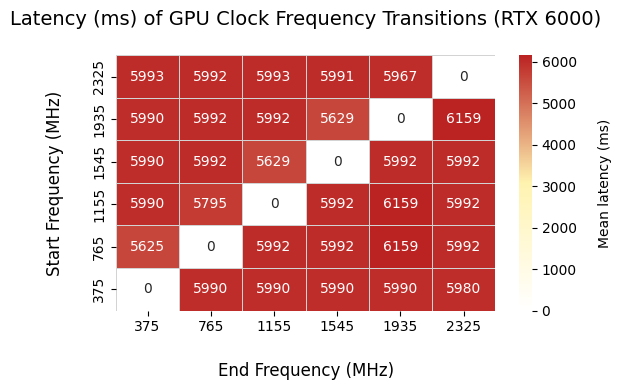

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = ["Times New Roman"]

plt.figure(figsize=(6, 4))

ax = sns.heatmap(
    heatmap_df,
    annot=True,
    fmt=".0f",
    cmap=white_red_cmap,
    linewidths=0.5,
    linecolor="lightgray",
    cbar_kws={"label": "\nMean latency (ms)"}
)

ax.set_title("Latency (ms) of GPU Clock Frequency Transitions (RTX 6000)\n", fontsize=14, )
ax.set_xlabel("End Frequency (MHz)", fontsize=12, labelpad=20)
ax.set_ylabel("Start Frequency (MHz)", fontsize=12, labelpad=20)


# plt.title("System Latency for GPU Frequency Changes")
plt.xlabel("End Frequency (MHz)")
plt.ylabel("Start Frequency (MHz)")
plt.tight_layout()
plt.show()
